In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def getBetTime(df,t1,t2,mcolumn):
    return df[(t1 < df[mcolumn])&(df[mcolumn] < t2)].reset_index(drop=True)

def getDates1(dft):
    sal = pd.to_datetime(dft.dateStore, format="%Y-%m-%d %H:%M:%S.%f")+ timedelta(hours=5)
    dft['latency in seconds'] = (sal-pd.to_datetime(dft.Vic_date, format="%Y-%m-%d %H:%M:%S.%f"))/ np.timedelta64(1, 's')
    return dft[['latency in seconds','alarmas']]

def getDates2(dft):
    sal = pd.to_datetime(dft.dateStore, format="%Y-%m-%d %H:%M:%S.%f")
    dft['latency in seconds'] = (sal-pd.to_datetime(dft.Vic_date, format="%Y-%m-%d %H:%M:%S.%f"))/ np.timedelta64(1, 's')
    return dft[['latency in seconds','alarmas']]

In [7]:
dft25 = pd.read_csv('perfRaspberry/25_paso0_3.csv')
dft25  ["alarmas"]= "25"

dft50 = pd.read_csv('perfRaspberry/50_paso0_3.csv')
dft50  ["alarmas"]= "50"

dft75 = pd.read_csv('perfRaspberry/75_paso0_3.csv')
dft75  ["alarmas"]= "75"

dft100 = pd.read_csv('perfRaspberry/100_paso0_3.csv')
dft100  ["alarmas"]= "100"

dft125 = pd.read_csv('perfRaspberry/125_paso0_3.csv')
dft125  ["alarmas"]= "125"

dft150 = pd.read_csv('perfRaspberry/150_paso0_3.csv')
dft150  ["alarmas"]= "150"

dft175 = pd.read_csv('perfRaspberry/175_paso0_3.csv')
dft175  ["alarmas"]= "175"

dft200 = pd.read_csv('perfRaspberry/200_paso0_3.csv')
dft200  ["alarmas"]= "200"

dft225 = pd.read_csv('perfRaspberry/225_paso0_3.csv')
dft225  ["alarmas"]= "225"

dft250 = pd.read_csv('perfRaspberry/250_paso0_3.csv')
dft250  ["alarmas"]= "250"

In [4]:
def Append2(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6,mdtf7):
    mdtf1 = mdtf1.append(mdtf2)
    mdtf1 = mdtf1.append(mdtf3)
    mdtf1 = mdtf1.append(mdtf4)
    mdtf1 = mdtf1.append(mdtf5)
    mdtf1 = mdtf1.append(mdtf6)
    return mdtf1.append(mdtf7)

def Append10(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6,mdtf7,mdtf8,mdtf9,mdtf10):
    mdtf1 = mdtf1.append(mdtf2)
    mdtf1 = mdtf1.append(mdtf3)
    mdtf1 = mdtf1.append(mdtf4)
    mdtf1 = mdtf1.append(mdtf5)
    mdtf1 = mdtf1.append(mdtf6)
    mdtf1 = mdtf1.append(mdtf7)
    mdtf1 = mdtf1.append(mdtf8)
    mdtf1 = mdtf1.append(mdtf9)
    return mdtf1.append(mdtf10)

def CastOutLayers(mdtf1, column, lowerorgreater,mlimit):
    aux = []
    for row in mdtf1[column]:
        if type(row) is str:
            row =row.replace(".", "")
        if lowerorgreater == "<":
            if float(row) > mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
        elif lowerorgreater == ">":
            if float(row) < mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
    return aux

def Plotbox(mdtf1,mcolum,morder):
    plt.rcParams['figure.dpi'] = 140
    sns.boxplot(x='alarmas', y=mcolum, data=mdtf1, order=morder)
    ax = plt.gca()
    ax.grid(True)
    plt.show()
    
def GetCutdf(mdfpost,column,signo,val):
    if signo == '<':
        return  mdfpost[mdfpost[column] < val ][[column,'alarmas']].reset_index(drop=True)
    else:
        return  mdfpost[mdfpost[column] > val ][[column,'alarmas']].reset_index(drop=True)
    
def CastAndPlot(ndf, O_column, N_column, simbol, value, morder):
    ndf[N_column] = CastOutLayers(ndf, O_column, simbol,value)
    Plotbox(ndf,N_column,morder)

In [5]:
morder=["25", "50", "75", "100", "125", "150", "175","200","225","250"]

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


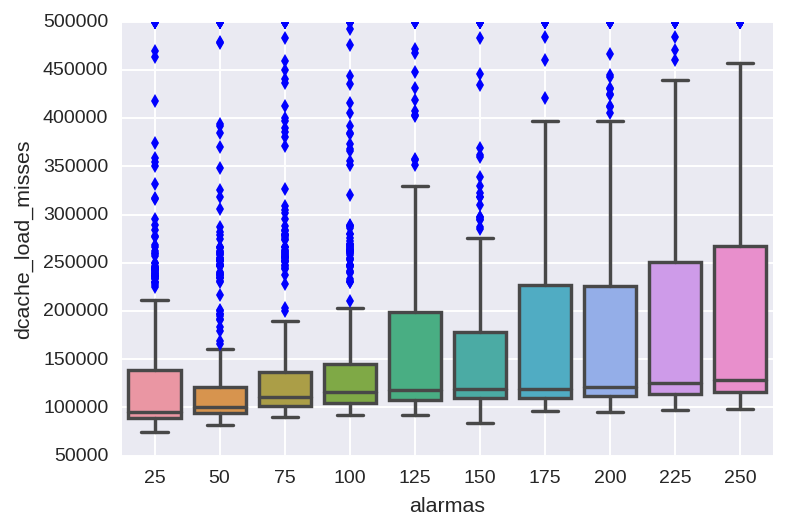

In [8]:
dcache_load_misses25 = dft25[['dcache_load_misses','alarmas']]
dcache_load_misses50 = dft50[['dcache_load_misses','alarmas']]
dcache_load_misses75 = dft75[['dcache_load_misses','alarmas']]
dcache_load_misses100 = dft100[['dcache_load_misses','alarmas']]
dcache_load_misses125 = dft125[['dcache_load_misses','alarmas']]
dcache_load_misses150 = dft150[['dcache_load_misses','alarmas']]
dcache_load_misses175 = dft175[['dcache_load_misses','alarmas']]
dcache_load_misses200 = dft200[['dcache_load_misses','alarmas']]
dcache_load_misses225 = dft225[['dcache_load_misses','alarmas']]
dcache_load_misses250 = dft250[['dcache_load_misses','alarmas']]
dcache_load_misses = Append10(dcache_load_misses25,dcache_load_misses50,dcache_load_misses75,dcache_load_misses100,
                              dcache_load_misses125,dcache_load_misses150,dcache_load_misses175,dcache_load_misses200,dcache_load_misses225,dcache_load_misses250)
CastAndPlot(dcache_load_misses,
              "dcache_load_misses","dcache_load_misses","<",500000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


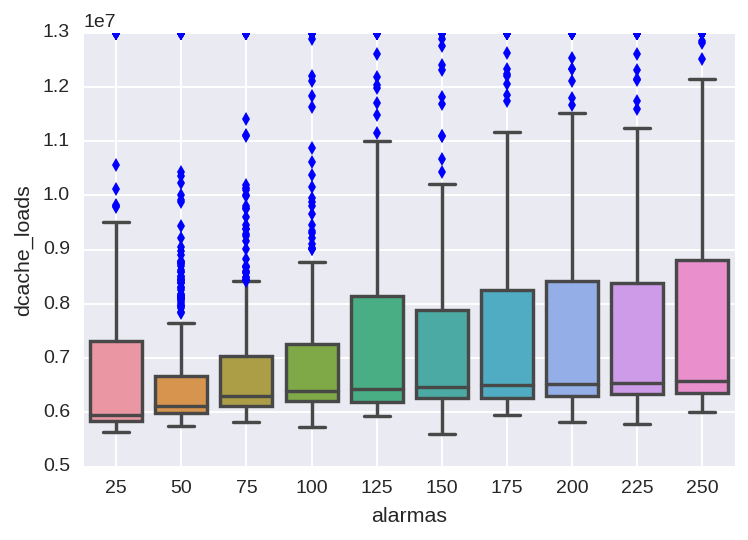

In [9]:
dcache_loads25 = dft25[['dcache_loads','alarmas']]
dcache_loads50 = dft50[['dcache_loads','alarmas']]
dcache_loads75 = dft75[['dcache_loads','alarmas']]
dcache_loads100 = dft100[['dcache_loads','alarmas']]
dcache_loads125 = dft125[['dcache_loads','alarmas']]
dcache_loads150 = dft150[['dcache_loads','alarmas']]
dcache_loads175 = dft175[['dcache_loads','alarmas']]
dcache_loads200 = dft200[['dcache_loads','alarmas']]
dcache_loads225 = dft225[['dcache_loads','alarmas']]
dcache_loads250 = dft250[['dcache_loads','alarmas']]
dcache_loads = Append10(dcache_loads25,dcache_loads50,dcache_loads75,dcache_loads100,dcache_loads125,
                        dcache_loads150,dcache_loads175,dcache_loads200,dcache_loads225,dcache_loads250)
CastAndPlot(dcache_loads,"dcache_loads","dcache_loads","<",13000000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


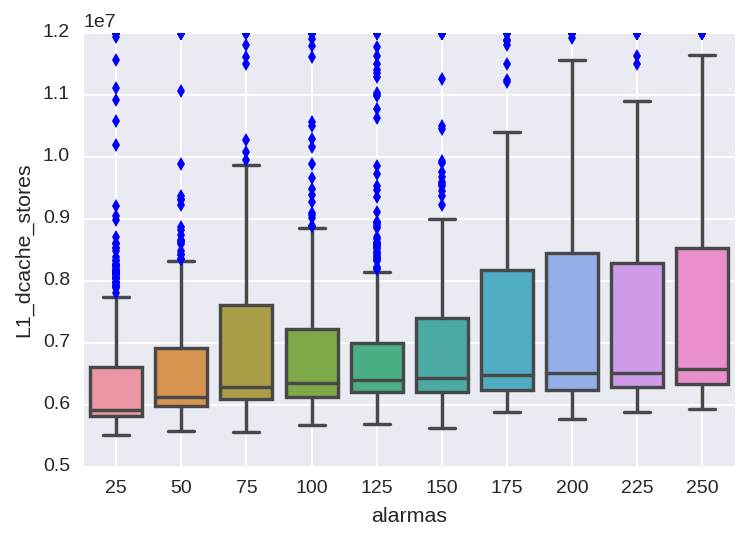

In [10]:
L1_dcache_stores25 = dft25[['L1_dcache_stores','alarmas']]
L1_dcache_stores50 = dft50[['L1_dcache_stores','alarmas']]
L1_dcache_stores75 = dft75[['L1_dcache_stores','alarmas']]
L1_dcache_stores100 = dft100[['L1_dcache_stores','alarmas']]
L1_dcache_stores125 = dft125[['L1_dcache_stores','alarmas']]
L1_dcache_stores150 = dft150[['L1_dcache_stores','alarmas']]
L1_dcache_stores175 = dft175[['L1_dcache_stores','alarmas']]
L1_dcache_stores200 = dft200[['L1_dcache_stores','alarmas']]
L1_dcache_stores225 = dft225[['L1_dcache_stores','alarmas']]
L1_dcache_stores250 = dft250[['L1_dcache_stores','alarmas']]
L1_dcache_stores = Append10(L1_dcache_stores25,L1_dcache_stores50,L1_dcache_stores75,L1_dcache_stores100,
                            L1_dcache_stores125,L1_dcache_stores150,L1_dcache_stores175,L1_dcache_stores200,L1_dcache_stores225,L1_dcache_stores250)
CastAndPlot(L1_dcache_stores,
              "L1_dcache_stores","L1_dcache_stores","<",12000000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


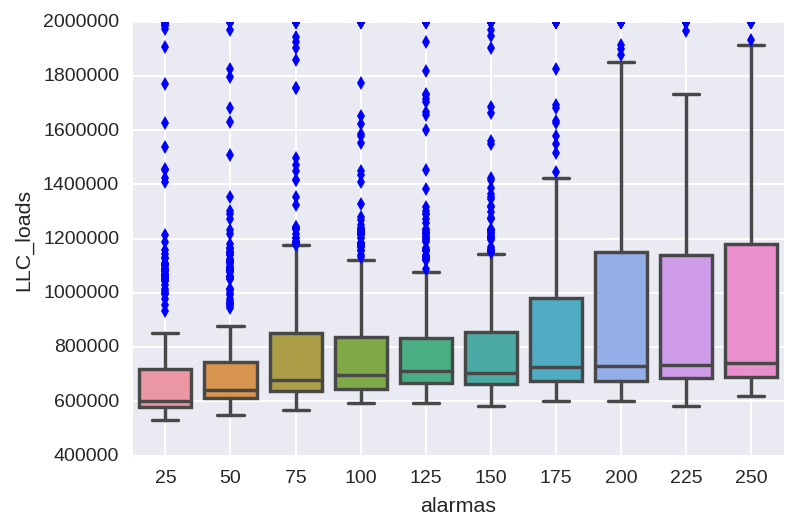

In [11]:
LLC_loads25 = dft25[['LLC_loads','alarmas']]
LLC_loads50 = dft50[['LLC_loads','alarmas']]
LLC_loads75 = dft75[['LLC_loads','alarmas']]
LLC_loads100 = dft100[['LLC_loads','alarmas']]
LLC_loads125 = dft125[['LLC_loads','alarmas']]
LLC_loads150 = dft150[['LLC_loads','alarmas']]
LLC_loads175 = dft175[['LLC_loads','alarmas']]
LLC_loads200 = dft200[['LLC_loads','alarmas']]
LLC_loads225 = dft225[['LLC_loads','alarmas']]
LLC_loads250 = dft250[['LLC_loads','alarmas']]
LLC_loads = Append10(LLC_loads25,LLC_loads50,LLC_loads75,LLC_loads100,LLC_loads125,LLC_loads150,
                     LLC_loads175,LLC_loads200,LLC_loads225,LLC_loads250)
CastAndPlot(LLC_loads,
              "LLC_loads","LLC_loads","<",2000000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


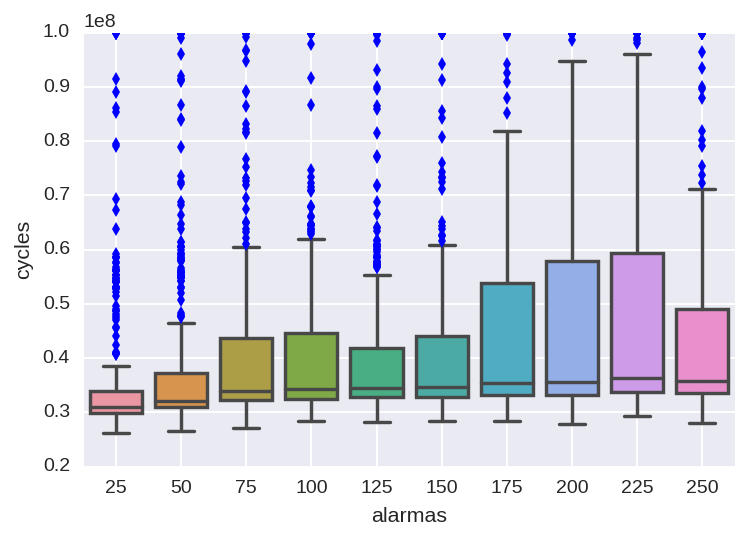

In [12]:
cycles25 = dft25[['cycles','alarmas']]
cycles50 = dft50[['cycles','alarmas']]
cycles75 = dft75[['cycles','alarmas']]
cycles100 = dft100[['cycles','alarmas']]
cycles125 = dft125[['cycles','alarmas']]
cycles150 = dft150[['cycles','alarmas']]
cycles175 = dft175[['cycles','alarmas']]
cycles200 = dft200[['cycles','alarmas']]
cycles225 = dft225[['cycles','alarmas']]
cycles250 = dft250[['cycles','alarmas']]
cycles = Append10(cycles25,cycles50,cycles75,cycles100,cycles125,cycles150,
              cycles175,cycles200,cycles225,cycles250)

CastAndPlot(cycles,"cycles","cycles","<",100000000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


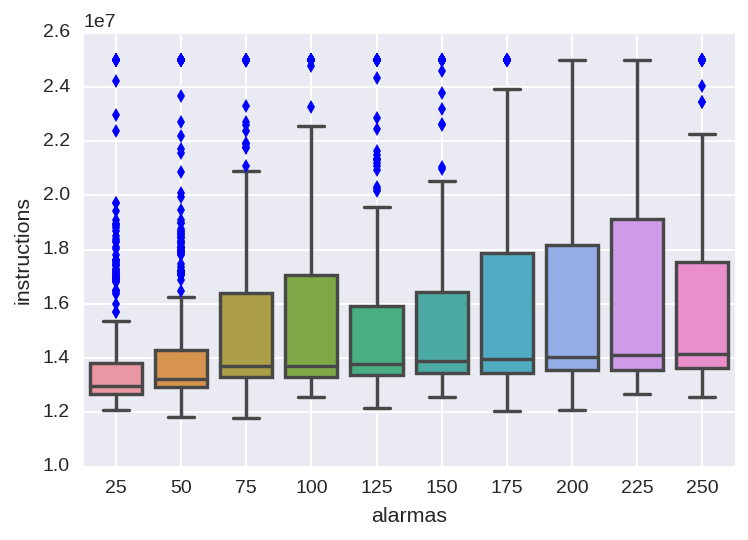

In [13]:
instructions25 = dft25[['instructions','alarmas']]
instructions50 = dft50[['instructions','alarmas']]
instructions75 = dft75[['instructions','alarmas']]
instructions100 = dft100[['instructions','alarmas']]
instructions125 = dft125[['instructions','alarmas']]
instructions150 = dft150[['instructions','alarmas']]
instructions175 = dft175[['instructions','alarmas']]
instructions200 = dft200[['instructions','alarmas']]
instructions225 = dft225[['instructions','alarmas']]
instructions250 = dft250[['instructions','alarmas']]
instructions = Append10(instructions25,instructions50,instructions75,instructions100,instructions125,
              instructions150,instructions175,instructions200,instructions225,instructions250)

CastAndPlot(instructions,"instructions","instructions","<",25000000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


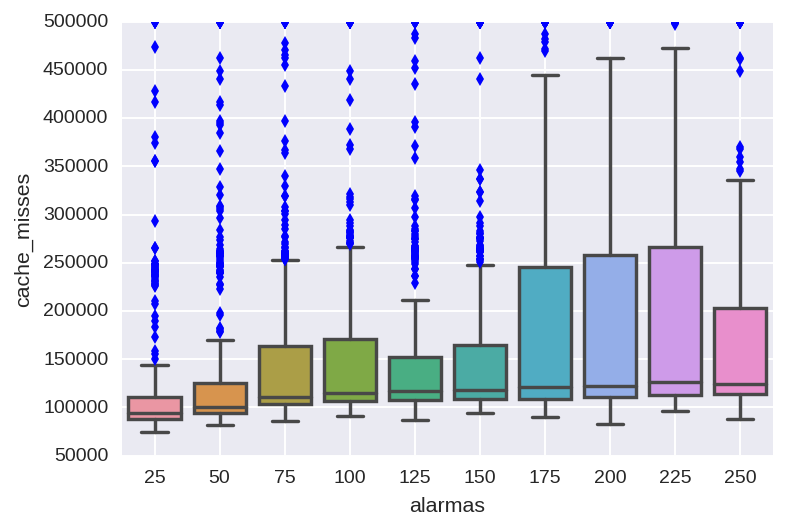

In [14]:
cache_misses25 = dft25[['cache_misses','alarmas']]
cache_misses50 = dft50[['cache_misses','alarmas']]
cache_misses75 = dft75[['cache_misses','alarmas']]
cache_misses100 = dft100[['cache_misses','alarmas']]
cache_misses125 = dft125[['cache_misses','alarmas']]
cache_misses150 = dft150[['cache_misses','alarmas']]
cache_misses175 = dft175[['cache_misses','alarmas']]
cache_misses200 = dft200[['cache_misses','alarmas']]
cache_misses225 = dft225[['cache_misses','alarmas']]
cache_misses250 = dft250[['cache_misses','alarmas']]
cache_misses = Append10(cache_misses25,cache_misses50,cache_misses75,cache_misses100,cache_misses125,
              cache_misses150,cache_misses175,cache_misses200,cache_misses225,cache_misses250)
CastAndPlot(cache_misses,"cache_misses","cache_misses","<",500000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


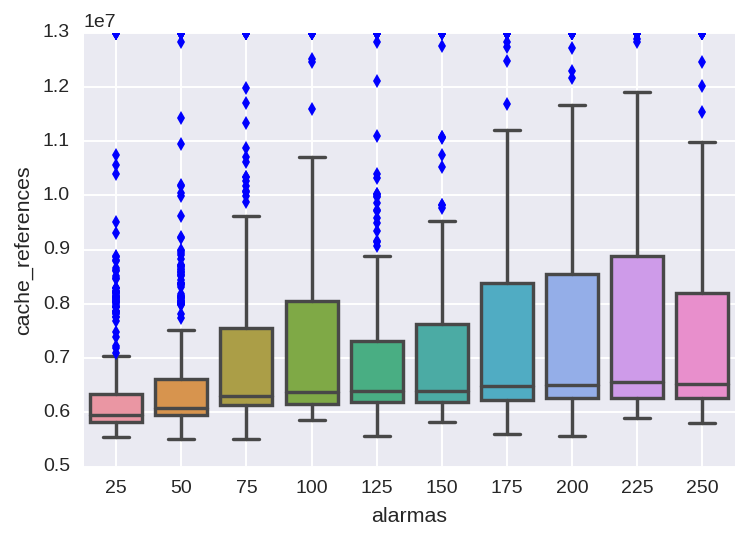

In [15]:
cache_references25 = dft25[['cache_references','alarmas']]
cache_references50 = dft50[['cache_references','alarmas']]
cache_references75 = dft75[['cache_references','alarmas']]
cache_references100 = dft100[['cache_references','alarmas']]
cache_references125 = dft125[['cache_references','alarmas']]
cache_references150 = dft150[['cache_references','alarmas']]
cache_references175 = dft175[['cache_references','alarmas']]
cache_references200 = dft200[['cache_references','alarmas']]
cache_references225 = dft225[['cache_references','alarmas']]
cache_references250 = dft250[['cache_references','alarmas']]
cache_references = Append10(cache_references25,cache_references50,cache_references75,cache_references100,cache_references125,
              cache_references150,cache_references175,cache_references200,cache_references225,cache_references250)
CastAndPlot(cache_references,"cache_references","cache_references","<",13000000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


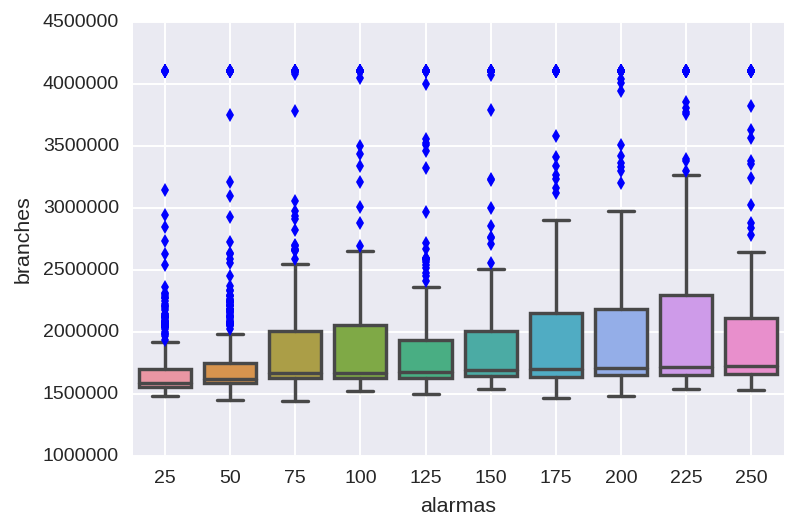

In [16]:
branches25 = dft25[['branches','alarmas']]
branches50 = dft50[['branches','alarmas']]
branches75 = dft75[['branches','alarmas']]
branches100 = dft100[['branches','alarmas']]
branches125 = dft125[['branches','alarmas']]
branches150 = dft150[['branches','alarmas']]
branches175 = dft175[['branches','alarmas']]
branches200 = dft200[['branches','alarmas']]
branches225 = dft225[['branches','alarmas']]
branches250 = dft250[['branches','alarmas']]
branches = Append10(branches25,branches50,branches75,branches100,branches125,branches150,
                    branches175,branches200,branches225,branches250)
CastAndPlot(branches,"branches","branches","<",4100000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


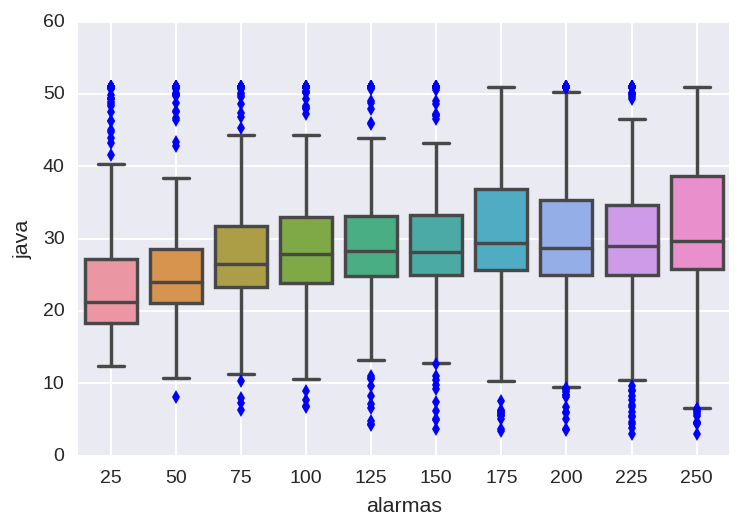

In [17]:
java25 = dft25[['java','alarmas']]
java50 = dft50[['java','alarmas']]
java75 = dft75[['java','alarmas']]
java100 = dft100[['java','alarmas']]
java125 = dft125[['java','alarmas']]
java150 = dft150[['java','alarmas']]
java175 = dft175[['java','alarmas']]
java200 = dft200[['java','alarmas']]
java225 = dft225[['java','alarmas']]
java250 = dft250[['java','alarmas']]

java = Append10(java25,java50,java75,java100,java125,
                   java150,java175,java200,java225,java250)
CastAndPlot(java,"java","java","<",51,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


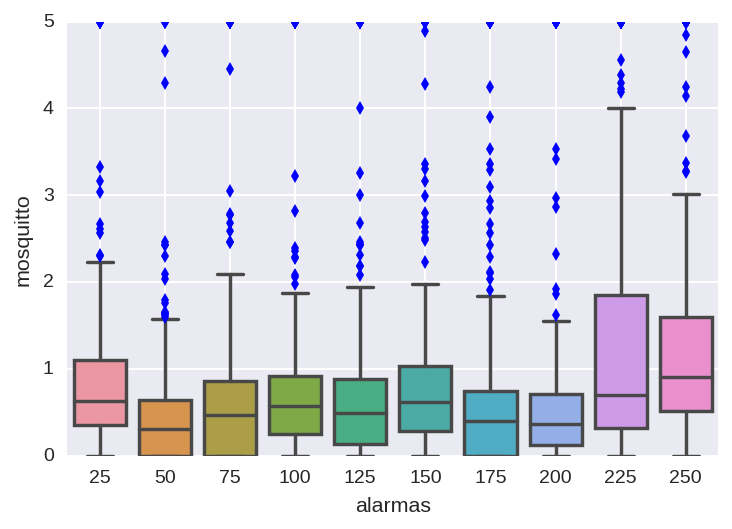

In [20]:
mosquitto25 = dft25[['mosquitto','alarmas']]
mosquitto50 = dft50[['mosquitto','alarmas']]
mosquitto75 = dft75[['mosquitto','alarmas']]
mosquitto100 = dft100[['mosquitto','alarmas']]
mosquitto125 = dft125[['mosquitto','alarmas']]
mosquitto150 = dft150[['mosquitto','alarmas']]
mosquitto175 = dft175[['mosquitto','alarmas']]
mosquitto200 = dft200[['mosquitto','alarmas']]
mosquitto225 = dft225[['mosquitto','alarmas']]
mosquitto250 = dft250[['mosquitto','alarmas']]

mosquitto = Append10(mosquitto25,mosquitto50,mosquitto75,mosquitto100,mosquitto125,
                   mosquitto150,mosquitto175,mosquitto200,mosquitto225,mosquitto250)
CastAndPlot(mosquitto,"mosquitto","mosquitto","<",5,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


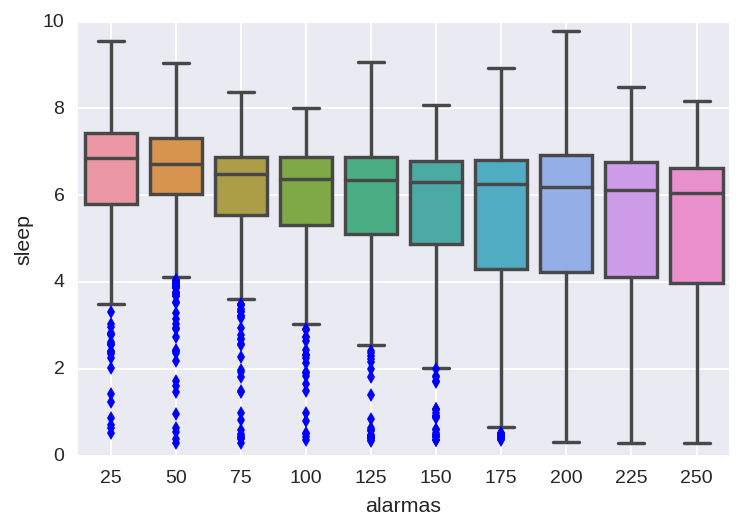

In [21]:
sleep25 = dft25[['sleep','alarmas']]
sleep50 = dft50[['sleep','alarmas']]
sleep75 = dft75[['sleep','alarmas']]
sleep100 = dft100[['sleep','alarmas']]
sleep125 = dft125[['sleep','alarmas']]
sleep150 = dft150[['sleep','alarmas']]
sleep175 = dft175[['sleep','alarmas']]
sleep200 = dft200[['sleep','alarmas']]
sleep225 = dft225[['sleep','alarmas']]
sleep250 = dft250[['sleep','alarmas']]

sleep = Append10(sleep25,sleep50,sleep75,sleep100,sleep125,
                   sleep150,sleep175,sleep200,sleep225,sleep250)
CastAndPlot(sleep,"sleep","sleep","<",40,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


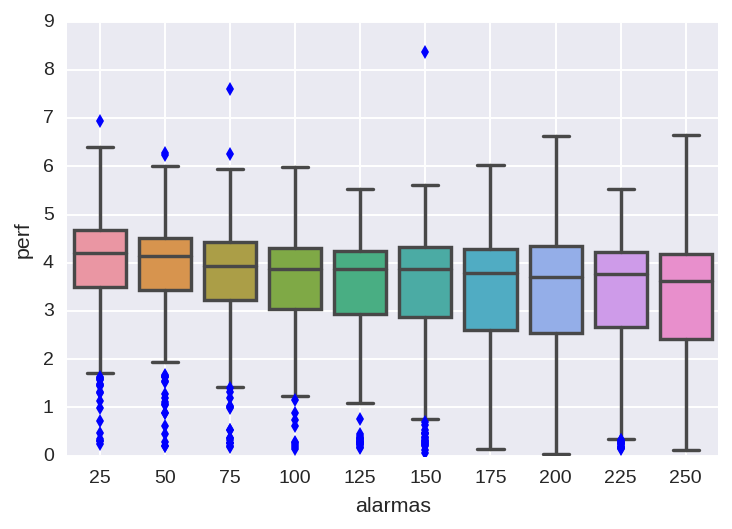

In [22]:
perf25 = dft25[['perf','alarmas']]
perf50 = dft50[['perf','alarmas']]
perf75 = dft75[['perf','alarmas']]
perf100 = dft100[['perf','alarmas']]
perf125 = dft125[['perf','alarmas']]
perf150 = dft150[['perf','alarmas']]
perf175 = dft175[['perf','alarmas']]
perf200 = dft200[['perf','alarmas']]
perf225 = dft225[['perf','alarmas']]
perf250 = dft250[['perf','alarmas']]

perf = Append10(perf25,perf50,perf75,perf100,perf125,
                   perf150,perf175,perf200,perf225,perf250)
CastAndPlot(perf,"perf","perf","<",40,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


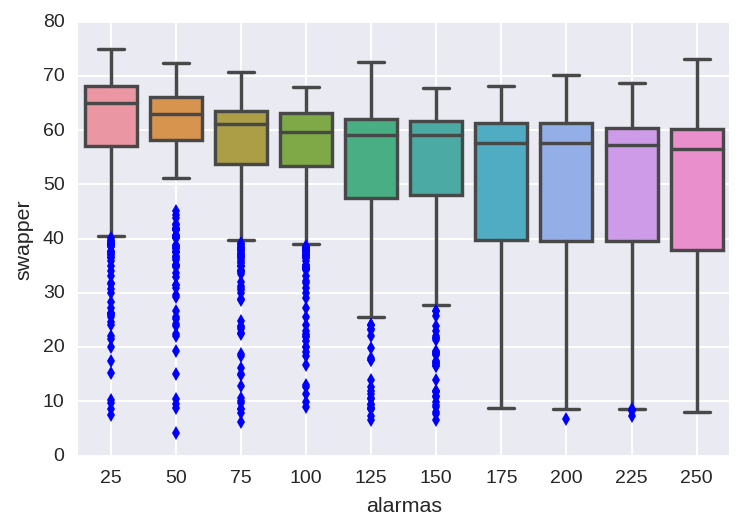

In [24]:
swapper25 = dft25[['swapper','alarmas']]
swapper50 = dft50[['swapper','alarmas']]
swapper75 = dft75[['swapper','alarmas']]
swapper100 = dft100[['swapper','alarmas']]
swapper125 = dft125[['swapper','alarmas']]
swapper150 = dft150[['swapper','alarmas']]
swapper175 = dft175[['swapper','alarmas']]
swapper200 = dft200[['swapper','alarmas']]
swapper225 = dft225[['swapper','alarmas']]
swapper250 = dft250[['swapper','alarmas']]

swapper = Append10(swapper25,swapper50,swapper75,swapper100,swapper125,
                   swapper150,swapper175,swapper200,swapper225,swapper250)
CastAndPlot(swapper,"swapper","swapper","<",91,morder)